# Word Embeddings

Word embeddings are a type of word representation that allows words to be represented as dense vectors of real numbers in a continuous vector space — capturing meaning, context, and relationships.

Unlike Bag of Words or TF-IDF (which are sparse and based on frequency), word embeddings preserve semantic meaning — words with similar meanings have similar vectors.

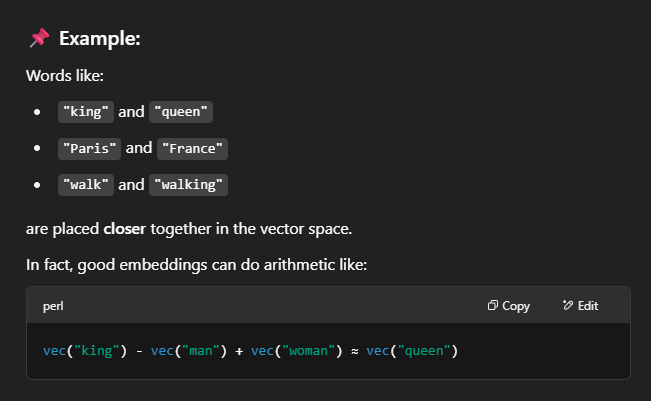

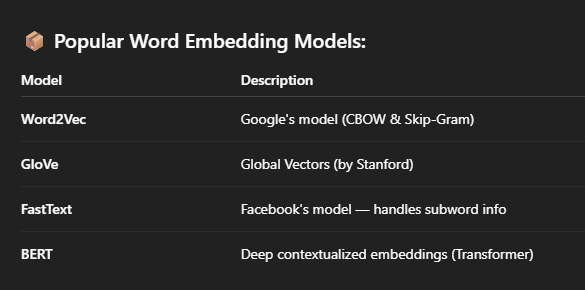

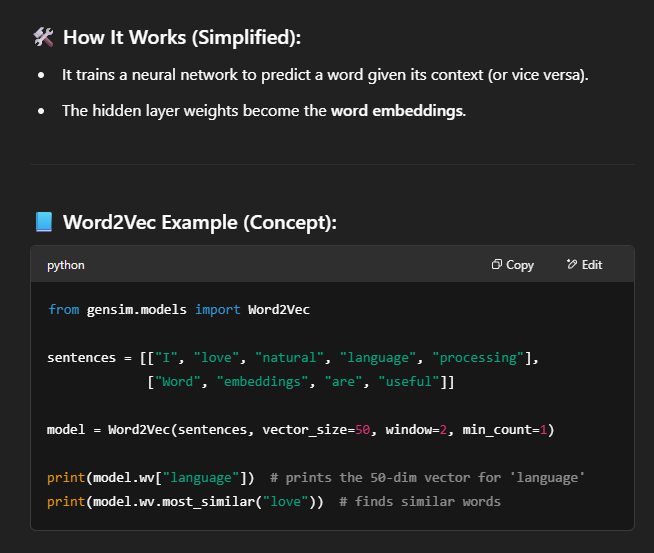

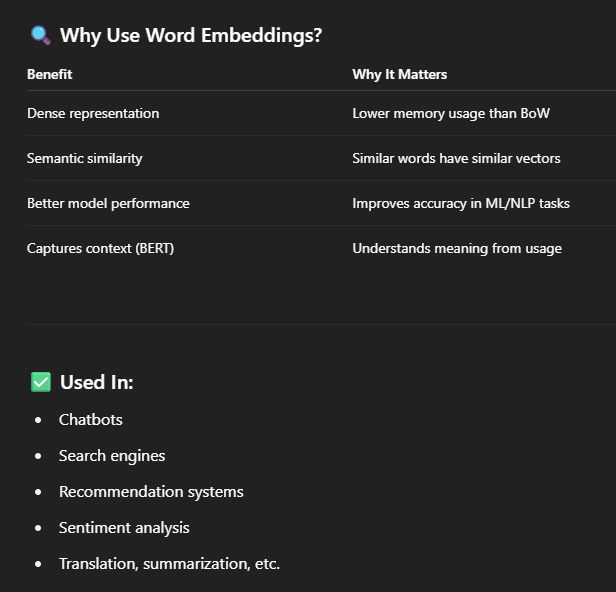

# Word Vectors

Word vectors in spaCy are pre-trained dense vector representations of words, used to capture semantic meaning and contextual similarity between words or documents.

These are basically word embeddings integrated directly into spaCy models (like en_core_web_md or en_core_web_lg).

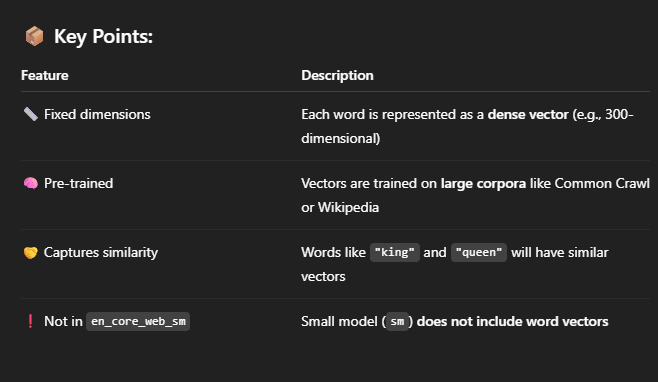

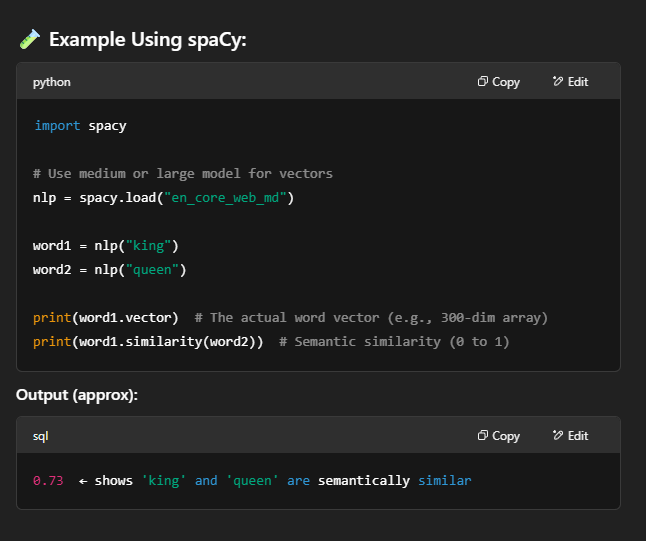

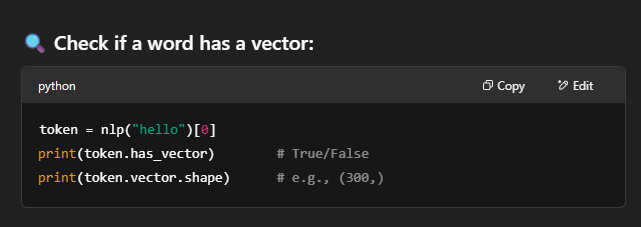

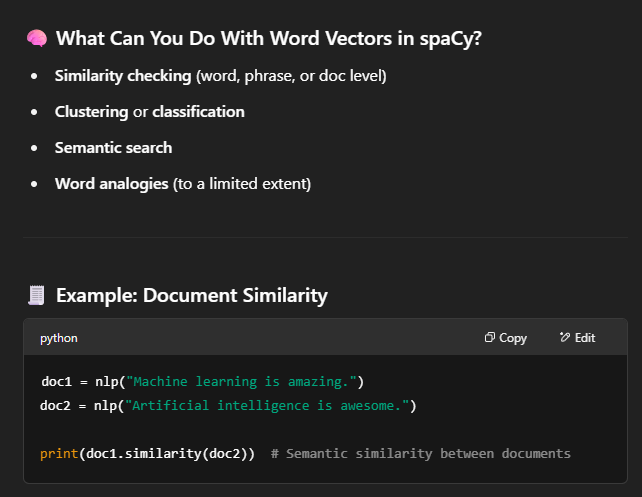

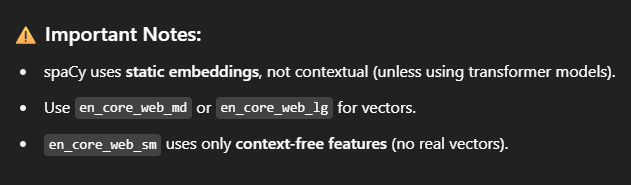

## Example: Word Vectors in Spacy

In [ ]:
# In word vectors we need to install large or medium english model.

!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:

import spacy

nlp = spacy.load("en_core_web_lg")
doc = nlp("dog cat banana kem")

for token in doc:
    print("Token :",token.text,"|","Vector :", token.has_vector,"|","OOV :", token.is_oov)


# Shape of a vector

Shape = doc[0].vector.shape
print("\nShape of a vector :",Shape)
print("\n")


# Compare a Base word with document

Base = nlp("Bread")


Doc = nlp("Bread Sandwich Burger Car Tiger Human Wheat")

for token in Doc:

    print(f"{token.text} <-> {Base.text}", token.similarity(Base))

print("\n")


# Create a def function to compare Base word with document

def compare(Base, WordtoCompare):

   BaseWord = nlp(Base)
   Doc = nlp(WordtoCompare)

   for token in Doc:

    print(f"{token.text} <-> {BaseWord.text}", token.similarity(BaseWord))


Comparision = compare("iphone", "apple samsung iphone dog kitten")
print("\n", Comparision)


# Default example of Similarity

King = nlp.vocab["King"].vector
Queen = nlp.vocab["Queen"].vector
Man = nlp.vocab["Man"].vector
Woman = nlp.vocab["Woman"].vector

Result = King - Man + Woman


from sklearn.metrics.pairwise import cosine_similarity

Similarity = cosine_similarity([Result], [Queen])
print("\nSimilarity :", Similarity)


Token : dog | Vector : True | OOV : False
Token : cat | Vector : True | OOV : False
Token : banana | Vector : True | OOV : False
Token : kem | Vector : True | OOV : False

Shape of a vector : (300,)


Bread <-> Bread 1.0
Sandwich <-> Bread 0.6874560117721558
Burger <-> Bread 0.544037401676178
Car <-> Bread 0.16441147029399872
Tiger <-> Bread 0.14492356777191162
Human <-> Bread 0.21103660762310028
Wheat <-> Bread 0.6572456359863281


apple <-> iphone 0.6339781284332275
samsung <-> iphone 0.6678677797317505
iphone <-> iphone 1.0
dog <-> iphone 0.1743103712797165
kitten <-> iphone 0.1468581259250641

 None

Similarity : [[0.78808445]]


## Text Classification Using Spacy Word Embeddings

In [ ]:
# Upload the Dataset

from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
import spacy


# Define the Dataset

df = pd.read_csv("Fake_Real_Data.csv")
print(df.head())
print("\nShape :", df.shape)


# Count of each category

Count = df.label.value_counts()
print("\nCount :", Count)


# Convert Text to Numbers in the Label Column

Target = {"Fake":0, "Real":1}
df["Label_Num"] = df.label.map(Target)
print("\n", df.head())


# Convert the contents in Text to Vectors

nlp = spacy.load("en_core_web_lg")

df["Text_Vector"] = df.Text.apply(lambda x: nlp(x).vector)
print("\n", df.head())


                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real

Shape : (9900, 2)

Count : label
Fake    5000
Real    4900
Name: count, dtype: int64

                                                 Text label  Label_Num
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake          0
1  U.S. conservative leader optimistic of common ...  Real          1
2  Trump proposes U.S. tax overhaul, stirs concer...  Real          1
3   Court Forces Ohio To Allow Millions Of Illega...  Fake          0
4  Democrats say Trump agrees to work on immigrat...  Real          1

                                                 Text label  Label_Num  \
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake     

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


# Split the Dataset to Train & Test

X_train, X_test, y_train, y_test = train_test_split(df.Text_Vector.values, df.Label_Num, test_size = 0.3, random_state = 2022)


# Convert Numpy array to 2D array

X_train_2D = np.stack(X_train)
X_test_2D = np.stack(X_test)


# Rescale Data using MinMax Scaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_2D)
X_test_scaled = scaler.transform(X_test_2D)


# Train using Multinomial NaiveBayes

nb = MultinomialNB()
nb.fit(X_train_scaled, y_train)


# Predict

y_pred = nb.predict(X_test_scaled)


# Classification report

MNB_Report = classification_report(y_test, y_pred)
print(MNB_Report)


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1510
           1       0.96      0.94      0.95      1460

    accuracy                           0.95      2970
   macro avg       0.95      0.95      0.95      2970
weighted avg       0.95      0.95      0.95      2970




               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1510
           1       0.97      0.98      0.98      1460

    accuracy                           0.98      2970
   macro avg       0.98      0.98      0.98      2970
weighted avg       0.98      0.98      0.98      2970


Confusion Matrix : [[1461   49]
 [  24 1436]]




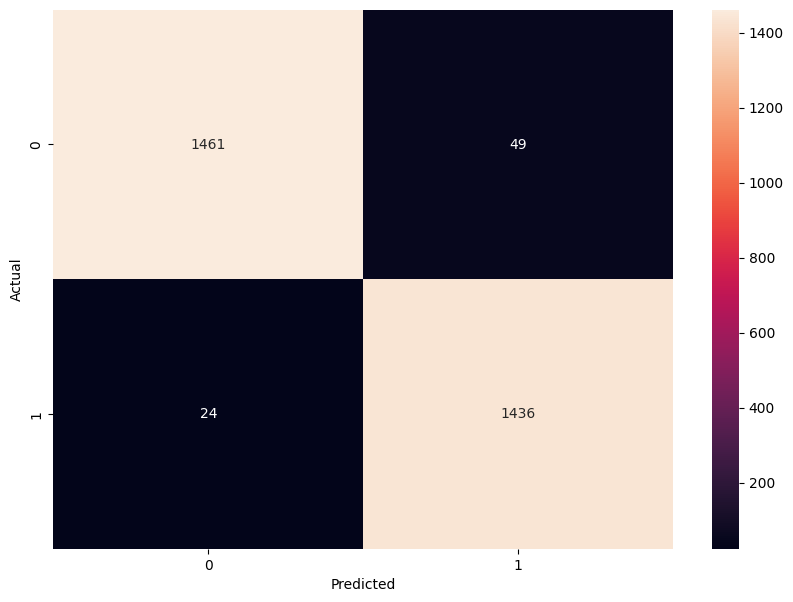

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Train using KNeighbors Classifier


KNN = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
KNN.fit(X_train_2D, y_train)


# Predict

y_pred = KNN.predict(X_test_2D)


# Classification report

KNN_Report = classification_report(y_test, y_pred)
print("\n", KNN_Report)


# Confusion Matrix

Matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix :", Matrix)
print("\n")

# Plot the Confusion Matrix

plt.figure(figsize = (10,7))
sns.heatmap(Matrix, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Key Takeaways:**

1. KNN model which didn't perform well in the vectorization techniques like Bag of words, and TF-IDF due to very high dimensional vector space, performed really well with glove vectors due to only 300-dimensional vectors and very good embeddings(similar and related words have almost similar embeddings) for the given text data.

2. MultinomialNB model performed decently well but did not come into the top list because in the 300-dimensional vectors we also have the negative values present. The Naive Bayes model does not fit the data if there are negative values. So, to overcome this shortcoming, we have used the Min-Max scaler to bring down all the values between 0 to 1. In this process, there will be a possibility of variance and information loss among the data. But anyhow we got a decent recall and f1 scores.